# Linear Regression From Scratch

***
## Table of Contents
1. [Introduction](#1-introduction)
1. [Loading Data](#2-loading-data)
1. [Linear Regression Model](#3-linear-regression-model)
1. [Loss Function: Mean Squared Error (MSE)](#4-loss-function-mean-squared-error-mse)
1. [Gradient Descent Optimisation](#5-gradient-descent-optimisation)
1. [Model Evaluation](#6-model-evaluation)
    - [Mean Squared Error (MSE)](#mean-squared-error-mse)
    - [Root Mean Squared Error (RMSE)](#root-mean-squared-error-rmse)
    - [Mean Absolute Error (MAE)](#mean-absolute-error-mae)
    - [R-Squared ($R^2$)](#r-squared)
1. [Model Encapsulation](#7-model-encapsulation)
1. [Predictions and Visualisation](#8-predictions-and-visualisation)
1. [Comparison with Scikit-Learn](#9-comparison-with-scikit-learn)
1. [References](#10-references)
***


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from numpy.typing import NDArray

## 1. Introduction
Linear regression is a fundamental and statistical machine learning technique used to model the relationship between a dependent (target) variable $Y$ and one or more independent (feature) variable $X$. The objective is to fit a straight line (in case of simple linear regression, where only one feature is taken into consideration) that best describes how $Y$ changes as $X$ varies.

## 2. Loading Data

In [2]:
linear_data = pd.read_csv("../../_datasets/linear_data.txt", header=None)
X = np.array(linear_data.iloc[:, 0])
y = np.array(linear_data.iloc[:, 1])

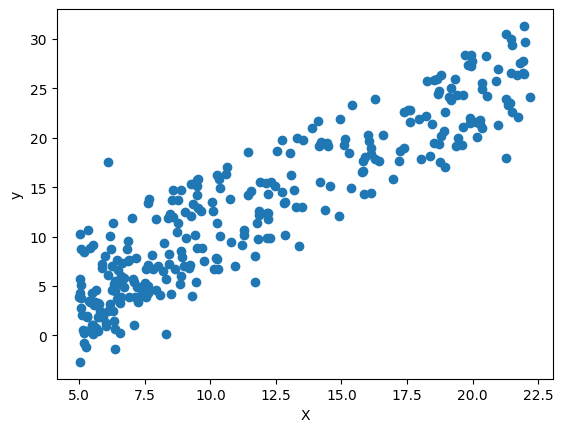

In [3]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## 3. Linear Regression Model

A linear regression model provides numerical predictions as a straight line on a dataset, assuming a linear relationship between two numerical variables. The formula for a simple linear regression is:

\begin{align*}
h = wx + b
\end{align*}

Where:

- $x$ is the independent variable.
- $w$ is the slope (weight, coefficient of $x$).
- $b$ is the intercept (bias, constant term).

In [4]:
# Linear function h
def h(
    w: float, b: float, x: float | NDArray[np.float64]
) -> float | NDArray[np.float64]:
    return w * x + b

## 4. Loss Function: Mean Squared Error (MSE)
The loss function (or the cost function) quantifies the error between the predicted values produced by a model and the actual target values from the data. Common loss functions are Mean Squared Error (MSE) for regression problems, and Cross-Entropy Loss for classification tasks.
Here's the equation of MSE:

\begin{align*}
L = \dfrac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
\end{align*}
Where:
- $y$ is the actual value.
- $\hat{y}$ is the predicted value.
- $n$ is the number of data points.

MSE is simply the average squared difference between the actual and the predicted values in the dataset.

In [5]:
# Compute Loss function L - Mean Squared Error (MSE)
def calculate_loss_MSE(
    w: float, b: float, X: NDArray[np.float64], y: NDArray[np.float64]
) -> float:
    total_err = 0.0
    for i in range(len(X)):
        y_hat = h(w, b, X[i])
        total_err += (y[i] - y_hat) ** 2
    return total_err / len(X)

## 5. Gradient Descent Optimisation


Gradient Descent is an algorithm that tries to find optimised hyperparameters by iteratively searching for a local minima of the loss function. It is one of the most important concepts in machine learning and is used to reduce errors when training models. There are four types of Gradient Descent: **Batch Gradient Descent**, **Stochastic Gradient Descent**, **Mini-Batch Gradient Descent** and **Momentum-Based Gradient Descent**. For practice purposes, the most basic type, **Batch Gradient Descent**, will be used in this notebook.

We compute the partial derivative of the loss function to determine the slope of the function at a given point. By iteratively adjusting the parameters of the model in the direction opposite to the gradient, the algorithm moves closer to the point where the cost function reaches its minimum value. This occurs when the slope of the function becomes zero, indicating that the gradient has flattened and the cost is minimised. When the slope is steep, we take a big step for each iteration. As we get closer to the optimised value, the step becomes smaller.

\begin{align*}
L &= \dfrac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 \\
&= \dfrac{1}{n} \sum_{i=1}^{n} (y_i - (w x_i + b))^2
\end{align*}


By applying the power rule $(f(x)^n)' = n \cdot f(x)^{n-1} \cdot f'(x)$, the derivatives of the loss function $L$ with respect to two different hyperparameters, $w$ and $b$, are described as follows:

\begin{align*}
\dfrac{dL}{dw} &= \dfrac{1}{n} \sum_{n=1}^{n} 2 \cdot (y_i - w x_i -b) \cdot \dfrac{\partial }{\partial w} (y_i - w x_i -b) \\
&= \dfrac{2}{n} \sum_{n=1}^{n} (y_i - w x_i -b) \cdot (-x_i) \\
&= - \dfrac{2}{n} \sum_{n=1}^{n} x_i (y_i - \hat{y_i})^2
\end{align*}



\begin{align*}
\dfrac{dL}{db} &= \dfrac{1}{n} \sum_{n=1}^{n} 2 \cdot (y_i - w x_i -b) \cdot \dfrac{\partial }{\partial b} (y_i - w x_i -b) \\
&= - \dfrac{2}{n} \sum_{n=1}^{n} (y_i - \hat{y_i})^2
\end{align*}

In [6]:
# Find the derivative of cost function L
def derivative_MSE(
    X: NDArray[np.float64], y: NDArray[np.float64], y_pred: NDArray[np.float64], n: int
) -> tuple[float, float]:
    dL_dw = -2 * np.sum((y - y_pred) * X) / n
    dL_db = -2 * np.sum(y - y_pred) / n
    return dL_dw, dL_db

In each iteration (epoch) of the gradient descent, the derivatives aboves are calculated and the hyperparameters $w$ and $b$ are be updated as:

\begin{align*}
w_{new} = w_{old} - \alpha \cdot \dfrac{\partial L}{\partial w}
\end{align*}

\begin{align*}
b_{new} = b_{old} - \alpha \cdot \dfrac{\partial L}{\partial b}
\end{align*}
where $\alpha$ is called the learning rate, a scaler value that controls the step size of updates during gradient descent.

In [7]:
# Execute Batch Gradient Descent
def gradient_descent(
    w: float,
    b: float,
    X: NDArray[np.float64],
    y: NDArray[np.float64],
    alpha: float,
    epochs: int,
    n: int,
) -> tuple[float, float, NDArray[np.float64]]:
    loss_list = []
    for _ in tqdm(range(epochs)):
        y_pred = h(w, b, X)
        loss_list.append(calculate_loss_MSE(w, b, X, y))
        dL_dw, dL_db = derivative_MSE(X, y, y_pred, n)
        w -= alpha * dL_dw
        b -= alpha * dL_db
    return w, b, np.array(loss_list)

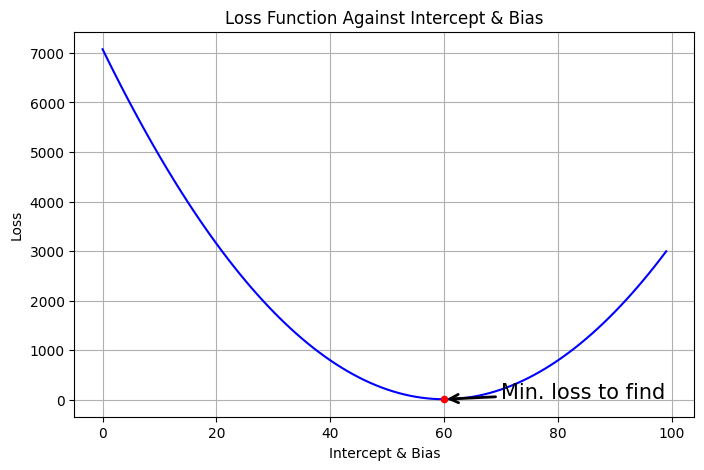

In [8]:
def plot_loss_function(
    w_list: NDArray[np.float64],
    b_list: NDArray[np.float64],
    X: NDArray[np.float64],
    y: NDArray[np.float64],
) -> None:
    trace_lf_list = []
    for w_val, b_val in zip(w_list, b_list):
        trace_lf_list.append(calculate_loss_MSE(w_val, b_val, X, y))
    trace_lf_w = np.array(trace_lf_list)
    plt.figure(figsize=(8, 5))
    plt.plot(trace_lf_w, color="b")

    min_loss_idx = np.argmin(trace_lf_w)
    min_loss_value = trace_lf_w[min_loss_idx]
    # Add a marker at the minimum value
    plt.scatter(min_loss_idx, min_loss_value, color="red", marker="o", s=20, zorder=5)
    plt.annotate(
        "Min. loss to find",
        xy=(min_loss_idx, min_loss_value),
        # Adjust arrow placement
        xytext=(min_loss_idx + 10, min_loss_value + 10),
        arrowprops=dict(facecolor="black", arrowstyle="->", lw=2),
        fontsize=15,
        color="black",
    )
    plt.title("Loss Function Against Intercept & Bias")
    plt.xlabel("Intercept & Bias")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()


random_w_vals = np.linspace(-5, 5, 100)
random_b_vals = np.linspace(-5, 5, 100)
plot_loss_function(random_w_vals, random_b_vals, X, y)

By tracing the curve of the loss function using arbitrary values for $w$ and $b$ (100 data points each evenly spaced between -5 and +5), we obtain a quadratic curve due to the squared term in the MSE formula. The red point at the bottom of the curve represents the point where the regression produces the least amount of error. Gradient descent attempts to find a value as close as possible to this point by optimising the hyperparameters.

Let's execute the gradient descent function assuming that $\alpha = 0.001$, $w=0$, and $b=0$.

In [9]:
# * alpha: Learning rate
alpha = 0.001
n = len(y)
epochs = 20000
# * Assume that w = 5 and b = 3
coeff_GD, intercept_GD, loss_array = gradient_descent(0, 0, X, y, alpha, epochs, n)
print(f"Coefficient (GD): {coeff_GD:.5f}, Intercept (GD): {intercept_GD:.5f}")

100%|██████████| 20000/20000 [00:03<00:00, 6569.40it/s]

Coefficient (GD): 1.37622, Intercept (GD): -3.38352


According to the obtained results, the optimised coefficient ($w$) and intercept ($b$) for this dataset are 1.37622 and -3.38352 respectively.

Notice that the total loss decreases over epochs as GD iteratively updates the hyperparameters.

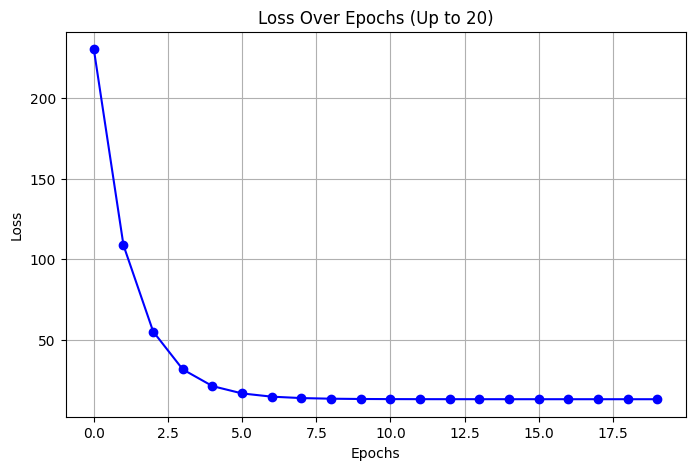

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(loss_array[:20], marker="o", color="b")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs (Up to 20)")
plt.grid(True)
plt.show()

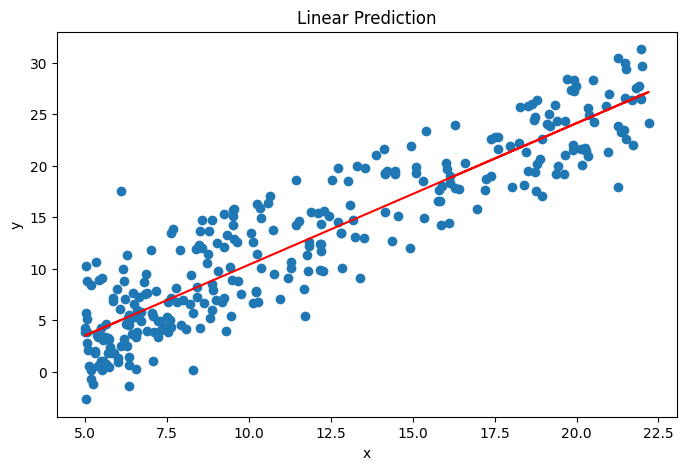

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y)
plt.plot(X, h(coeff_GD, intercept_GD, X), color="red")
plt.title("Linear Prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 6. Model Evaluation


### Mean Squared Error (MSE)
Mean Squared Error measures the average squared difference between predicted ($\hat y$) and actual ($y$) values. Large errors are penalised heavily. Smaller MSE indicates better predictions.

\begin{align*}
MSE = \dfrac{1}{n} \sum_{i=1}^{n}(\hat y_{i} - y_{i})^2
\end{align*}

In [12]:
def calculate_MSE(y_true: NDArray[np.float64], y_pred: NDArray[np.float64]) -> float:
    return np.mean((y_true - y_pred) ** 2)

### Root Mean Squared Error (RMSE)
Square root of MSE. It provides error in the same unit as the target variable ($y$) and easier to interpret.

\begin{align*}
RMSE = \sqrt{(MSE)}
\end{align*}

In [13]:
def calculate_RMSE(y_true: NDArray[np.float64], y_pred: NDArray[np.float64]) -> float:
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

### Mean Absolute Error (MAE)
Mean Absolute Error measures the average absolute difference between predicted ($\hat y$) and actual ($y$) values. It is less sensitive to outliers than MSE. Smaller MAE indicates better predictions.

\begin{align*}
MAE = \dfrac{1}{n} \sum_{i=1}^{n}|\hat y_{i} = y_{i}|
\end{align*}

In [14]:
def calculate_MAE(y_true: NDArray[np.float64], y_pred: NDArray[np.float64]) -> float:
    return np.mean(np.abs(y_true - y_pred))

<a id="r-squared"></a>
### R-Squared($R^2$)

R-squared indicated the proportion of variance in the dependent variable that is predictable from the independent variables. Value ranges from 0 to 1. Closer to 1 indicates a better fit.



Residual Sum of Squares ($SS_{residual}$): 
\begin{align*}
SS_{residual} = \sum_{i=1}^{n} (y_{i} - \hat y_{i})^{2}
\end{align*}

Total Sum of Squares ($SS_{total}$): 
\begin{align*}
SS_{total} = \sum_{i=1}^{n} (y_{i} - \bar y_{i})^{2}
\end{align*}

$R^2$ is computed as:

\begin{align*}

R^2 = 1 - \dfrac{SS_{residual}}{SS_{total}} = 1 - \dfrac{\sum_{i=1}^{n} (y_{i} - \hat y_{i})^{2}}{\sum_{i=1}^{n} (y_{i} - \bar y_{i})^{2}}

\end{align*}

where:

$y$: Actual target values.

$\bar y$: Mean of the actual target values.

$\hat y$: Precicted target values.

In [15]:
def calculate_r2(y_true: NDArray[np.float64], y_pred: NDArray[np.float64]) -> float:
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [16]:
def evaluate(
    y_true: NDArray[np.float64], y_pred: NDArray[np.float64]
) -> tuple[float, float, float, float]:
    """
    Calculate and return evaluation metrics for a regression model, including MSE, RMSE, MAE, and R-squared.

    Args:
        y_true : True target values.
        y_pred: Predicted target values.

    Returns:
        - mse: Mean Squared Error (MSE), indicating the average of the squared differences between predicted and true values.
        - rmse: Root Mean Squared Error (RMSE), indicating the standard deviation of the residuals.
        - mae: Mean Absolute Error (MAE), representing the average absolute difference between predicted and true values.
        - r2: R-squared (coefficient of determination), showing the proportion of variance in the dependent variable that is predictable from the independent variable(s).
    """
    mse = calculate_MSE(y_true, y_pred)
    rmse = calculate_RMSE(y_true, y_pred)
    mae = calculate_MAE(y_true, y_pred)
    r2 = calculate_r2(y_true, y_pred)
    return mse, rmse, mae, r2

## 7. Model Encapsulation
In practice, it is generally better to refactor these functions into a class-based implementation (encapsulation). It allows related functionalities to be grouped together, making the code more readable, reusable and easier to maintain. Let's encapsulate the functions above into a `CustomLinearRegression` class, including the visualisations.

In [17]:
class CustomLinearRegression:
    """
    A simple implementation of Linear Regression using gradient descent.
    """

    def __init__(
        self, w: float = 0.0, b: float = 0.0, alpha: float = 0.001, epochs: int = 20000
    ) -> None:
        """
        Initialise the CustomLinearRegression instance with given hyperparameters.

        Args:
            w: Initial weight (default is 0.0).
            b: Initial bias (default is 0.0).
            alpha: Learning rate for gradient descent (default is 0.001).
            epochs: Number of iterations for gradient descent (default is 20000).
        """
        self.w = w
        self.b = b
        self.alpha = alpha
        self.epochs = epochs
        self.loss_history = []

    def predict(self, X: float) -> float:
        """
        Predict the output for a given input using the regression line.

        Args:
            X: Input feature value.

        Returns:
            Predicted value.
        """
        return self.w * X + self.b

    def calculate_loss_MSE(
        self, y: NDArray[np.float64], y_pred: NDArray[np.float64]
    ) -> float:
        """
        Calculate the Mean Squared Error (MSE) loss.

        Args:
            y: True output values.
            y_pred: Predicted output values.

        Returns:
            Mean Squared Error.
        """
        return np.mean((y - y_pred) ** 2)

    def gradient_descent(self, X: NDArray[np.float64], y: NDArray[np.float64]) -> None:
        """
        Perform gradient descent to optimise the regression parameters.

        Args:
            X: Input feature values.
            y: True output values.
        """
        n: int = len(y)
        for _ in tqdm(range(self.epochs)):
            y_pred = np.array([self.predict(x_i) for x_i in X])

            loss = self.calculate_loss_MSE(y, y_pred)
            self.loss_history.append(loss)

            dL_dw = -(2 / n) * np.sum(X * (y - y_pred))
            dL_db = -(2 / n) * np.sum(y - y_pred)

            self.w -= self.alpha * dL_dw
            self.b -= self.alpha * dL_db

    def train(self, X: NDArray[np.float64], y: NDArray[np.float64]) -> None:
        """
        Train the model using gradient descent.

        Args:
            X: Input feature values.
            y: True output values.
        """
        self.gradient_descent(X, y)
        print(f"Training completed. Coefficient: {self.w:.5f}, Intercept: {self.b:.5f}")

    def plot_loss_history(self) -> None:
        """
        Plot the training loss over epochs.
        """
        plt.figure(figsize=(8, 5))
        plt.plot(self.loss_history[:20], marker="o", color="b")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss Over Epochs (Up to 20)")
        plt.grid(True)
        plt.show()

    def plot_prediction(
        self,
        X: NDArray[np.float64],
        y: NDArray[np.float64],
        x_test: float,
        y_pred_single: float,
    ) -> None:
        """
        Plot the regression line, training data, and test data point.

        Args:
            X: Input feature values for training data.
            y: Target values for training data.
            x_test: Test input value.
            y_pred_single: Predicted output for the test input.
        """
        plt.figure(figsize=(8, 5))
        plt.scatter(X, y)
        plt.plot(X, self.predict(X), color="red", label="Predicted Values")
        plt.scatter(
            x_test,
            y_pred_single,
            color="orange",
            edgecolor="black",
            label="Test Point",
            zorder=2,
        )
        plt.title("Linear Prediction")
        plt.xlabel("X")
        plt.ylabel("y")
        plt.legend()
        plt.show()

100%|██████████| 20000/20000 [00:01<00:00, 12113.60it/s]


Training completed. Coefficient: 1.37622, Intercept: -3.38352


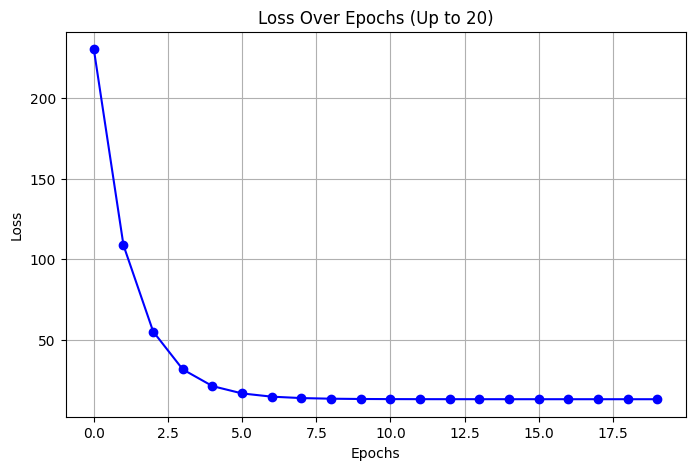

In [18]:
model = CustomLinearRegression(w=0, b=0, alpha=0.001, epochs=20000)
model.train(X, y)
model.plot_loss_history()

## 8. Predictions and Visualisation
Having successfully implemented our linear regression model, we can now use it to predict $y$ values for arbitrary $x$ inputs. For instance, given $x=15$, below are the prediction and correspoding visualisation:

Predicted value for X = 15: 17.25974


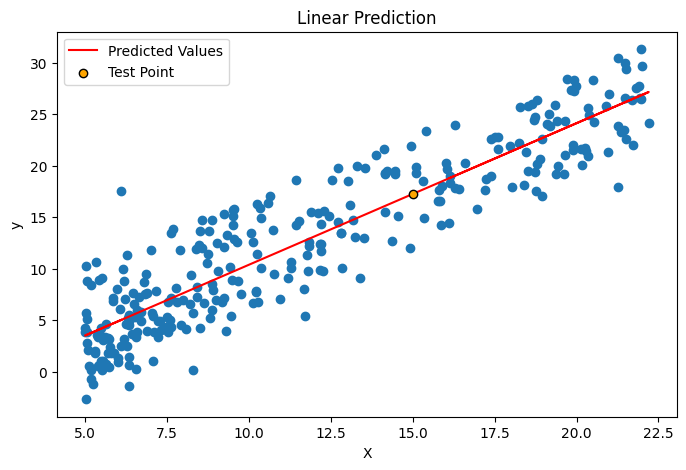

In [19]:
test_x = 15
predicted_value = model.predict(test_x)
print(f"Predicted value for X = {test_x}: {predicted_value:.5f}")
model.plot_prediction(X, y, test_x, predicted_value)

Predicting on the entire dataset:

In [20]:
y_pred = model.predict(X)
mse_custom, rmse_custom, mae_custom, r2_custom = evaluate(y, y_pred)
print(f"MSE (Custom): {mse_custom:.4f}")
print(f"RMSE (Custom): {rmse_custom:.4f}")
print(f"MAE (Custom): {mae_custom:.4f}")
print(f"R-Squared (Custom): {r2_custom:.4f}")
print("----------")

MSE (Custom): 10.9521
RMSE (Custom): 3.3094
MAE (Custom): 2.7397
R-Squared (Custom): 0.8351
----------


## 9. Comparison with Scikit-Learn
Scikit-learn is an open source library for machine learning in Python. It provides a plenty of tools that allow us to quickly build machine learning models.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# * For LinearRegression() from scikit-learn library, 2D arrays are expected.
X_sk = X.reshape(-1, 1)
y_sk = y.reshape(-1, 1)
lr = LinearRegression()
lr.fit(X_sk, y_sk)
# * .items() extracts the scalar value from the array, eliminating the outer brackets.
print(f"Intercept (sklearn): {lr.intercept_.item():.5f}")
print(f"Intercept (Custom): {model.b:.5f}")
print(f"Coef. of regression (sklearn): {lr.coef_.item():.5f}")
print(f"Coef. of regression (Custom): {model.w:.5f}")

Intercept (sklearn): -3.38684
Intercept (Custom): -3.38352
Coef. of regression (sklearn): 1.37645
Coef. of regression (Custom): 1.37622


In [22]:
y_pred_sk = lr.predict(X_sk)
mse_sk = mean_squared_error(y_sk, y_pred_sk)
rmse_sk = np.sqrt(mse_sk)
mae_sk = mean_absolute_error(y_sk, y_pred_sk)
r2_sk = r2_score(y_sk, y_pred_sk)
print(f"MSE (sklearn): {mse_sk:.4f}")
print(f"MSE (Custom): {mse_custom:.4f}")
print("----------")
print(f"RMSE (sklearn): {rmse_sk:.4f}")
print(f"RMSE (Custom): {rmse_custom:.4f}")
print("----------")
print(f"MAE (sklearn): {mae_sk:.4f}")
print(f"MAE (Custom): {mae_custom:.4f}")
print("----------")
print(f"R-Squared (sklearn): {r2_sk:.4f}")
print(f"R-Squared (Custom): {r2_custom:.4f}")

MSE (sklearn): 10.9521
MSE (Custom): 10.9521
----------
RMSE (sklearn): 3.3094
RMSE (Custom): 3.3094
----------
MAE (sklearn): 2.7396
MAE (Custom): 2.7397
----------
R-Squared (sklearn): 0.8351
R-Squared (Custom): 0.8351


In [23]:
test_x_sk = np.array([test_x]).reshape(-1, 1)
print(f"Predicted y value for X = 15 (sklearn): {lr.predict(test_x_sk)[0, 0]:.5f}")
print(f"Predicted y value for X = 15 (Custom): {model.predict(test_x):.5f}")

Predicted y value for X = 15 (sklearn): 17.25991
Predicted y value for X = 15 (Custom): 17.25974


## 10. References

1. GeeksforGeeks. (2025). *Linear Regression in Machine learning*. <br>
https://www.geeksforgeeks.org/machine-learning/ml-linear-regression/

1. NeuralNine. (2021). *Linear Regression From Scratch in Python (Mathematical)* [YouTube Video].<br>
https://youtu.be/VmbA0pi2cRQ

1. Nicholas Renotte. (2022). *Building the Gradient Descent Algorithm in 15 Minutes | Coding Challenge* [YouTube Video]. <br>
https://youtu.be/Souzjv6WfrY

1. Priyanshu Vats. (2020). *Linear Regression, Cost Function and Gradient Descent Algorithm..Clearly Explained !!* [YouTube Video].<br>
https://youtu.be/erfeZg27B7A

1. scikit-learn. (n.d.). *LinearRegression — scikit-learn API Reference.* <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

1. StatQuest with Josh Starmer. (2022). *Linear Regression, Clearly Explained!!!* [YouTube Video]. <br>
https://youtu.be/7ArmBVF2dCs